In [242]:
import pandas as pd
data=pd.read_csv("C://Users//HP//Desktop//SeoulBikeData.csv")
data
data.shape

(8760, 14)

In [243]:
data["Date"]=pd.to_datetime(data["Date"],format='mixed')
data

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [244]:
data["Month"]=data["Date"].dt.month
data["Year"]=data["Date"].dt.year
data["Day"]=data["Date"].dt.day

In [245]:
data=data.drop('Date',axis=1)
data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


In [246]:
q1=data["Rented Bike Count"].quantile(0.25)
q3=data["Rented Bike Count"].quantile(0.75)
iqr=q3-q1
q1,q3,iqr

(191.0, 1065.25, 874.25)

In [247]:
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit

(-1120.375, 2376.625)

In [248]:
new_data=data.loc[(data["Rented Bike Count"]<upper_limit)&(data["Rented Bike Count"]>lower_limit)]
print("Before removing outliers",len(data))
print("after removing outliers",len(new_data))
print("outliers:",len(data)-len(new_data))

Before removing outliers 8760
after removing outliers 8602
outliers: 158


In [249]:
q1=new_data["Solar Radiation (MJ/m2)"].quantile(0.25)
q3=new_data["Solar Radiation (MJ/m2)"].quantile(0.75)
iqr=q3-q1
upper_limit=q3+(1.5*iqr)
lower_limit=q1-(1.5*iqr)
lower_limit,upper_limit
new_data1=new_data.loc[(data["Solar Radiation (MJ/m2)"]<upper_limit)&(data["Solar Radiation (MJ/m2)"]>lower_limit)]
new_data1
new_data1.shape

(7962, 16)

In [250]:
incontrol=new_data[(new_data["Rainfall(mm)"]>(3*0.15*1.13))|(data["Rainfall(mm)"]<-(3*0.15*1.13))]
outliers=pd.DataFrame(incontrol)
index=outliers.index.tolist()
index

C:\Users\HP\AppData\Local\Temp\ipykernel_16220\3445978373.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  incontrol=new_data[(new_data["Rainfall(mm)"]>(3*0.15*1.13))|(data["Rainfall(mm)"]<-(3*0.15*1.13))]


[54,
 57,
 141,
 222,
 225,
 417,
 420,
 561,
 564,
 567,
 723,
 933,
 1266,
 1458,
 1461,
 2019,
 2151,
 2154,
 2157,
 2160,
 2253,
 2256,
 2259,
 2262,
 2331,
 2334,
 2502,
 2505,
 2508,
 2978,
 2979,
 2980,
 2981,
 2982,
 3007,
 3008,
 3016,
 3017,
 3019,
 3021,
 3026,
 3027,
 3028,
 3090,
 3091,
 3142,
 3143,
 3220,
 3222,
 3223,
 3224,
 3225,
 3226,
 3425,
 3428,
 3429,
 3430,
 3431,
 3432,
 3434,
 3436,
 3437,
 3438,
 3439,
 3440,
 3441,
 3442,
 3443,
 3444,
 3445,
 3446,
 3447,
 3448,
 3450,
 3451,
 3452,
 3453,
 3459,
 3655,
 3660,
 3661,
 3669,
 3671,
 3747,
 3748,
 3749,
 3750,
 3751,
 3752,
 3753,
 3754,
 3755,
 3756,
 3896,
 3897,
 3898,
 3899,
 3900,
 3901,
 3902,
 3903,
 3904,
 3905,
 3906,
 3907,
 3908,
 3910,
 3911,
 3987,
 3990,
 3993,
 3994,
 3997,
 4010,
 4011,
 4012,
 4016,
 4017,
 4018,
 4019,
 4020,
 4025,
 4026,
 4028,
 4029,
 4030,
 4031,
 4032,
 4033,
 4035,
 4036,
 4145,
 4146,
 4147,
 4151,
 4152,
 4153,
 4154,
 4316,
 4631,
 4632,
 4686,
 4687,
 4688,
 4689,

In [251]:
final_data=new_data1.drop(index)
final_data

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,11,2018,30


In [252]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
label_encoder=LabelEncoder()
final_data['Holiday']=label_encoder.fit_transform(final_data['Holiday'])
final_data['Seasons']=label_encoder.fit_transform(final_data['Seasons'])
final_data['Functioning Day']=label_encoder.fit_transform(final_data['Functioning Day'])
pd.DataFrame(final_data)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,12
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,12
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,3,1,1,1,2017,12
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,3,1,1,1,2017,12
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,3,1,1,1,2017,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0,1,1,11,2018,30
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0,1,1,11,2018,30
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0,1,1,11,2018,30
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0,1,1,11,2018,30


In [253]:
y=final_data["Rented Bike Count"]
y

0        254
1        204
2        173
3        107
4         78
        ... 
8755    1003
8756     764
8757     694
8758     712
8759     584
Name: Rented Bike Count, Length: 7641, dtype: int64

In [254]:
X=final_data[["Hour","Temperature(°C)","Functioning Day","Solar Radiation (MJ/m2)","Humidity(%)","Seasons"]]
X

,Hour,Temperature(°C),Functioning Day,Solar Radiation (MJ/m2),Humidity(%),Seasons
0,0,-5.2,1,0.0,37,3
1,1,-5.5,1,0.0,38,3
2,2,-6.0,1,0.0,39,3
3,3,-6.2,1,0.0,40,3
4,4,-6.0,1,0.0,36,3
...,...,...,...,...,...,...
8755,19,4.2,1,0.0,34,0
8756,20,3.4,1,0.0,37,0
8757,21,2.6,1,0.0,39,0
8758,22,2.1,1,0.0,41,0


In [255]:
import pandas as pd
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [256]:
X_train.shape

(6112, 6)

In [257]:
y_train.shape

(6112,)

In [258]:
X_test.shape

(1529, 6)

In [259]:
y_test.shape

(1529,)

# Ridge Regression

In [360]:
variable_selection_rmse={}

In [361]:
variable_selection_rsq={}

In [362]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error,r2_score
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(X_train,y_train)

Ridge()

In [363]:
Ridge_y_pred=ridge_model.predict(X_test)
Ridge_y_pred

array([ 423.51253518,  442.62922437,  389.29548391, ...,  626.27924149,
         77.15455608, 1154.78818955])

In [364]:
mse=mean_squared_error(y_test,Ridge_y_pred)
mse

153633.0170717226

In [365]:
import numpy as np
rmse=np.sqrt(mse)
rmse

391.9604789665951

In [366]:
rsq=r2_score(y_test,Ridge_y_pred)
rsq

0.5719486833152825

In [367]:
variable_selection_rmse["Ridge"]=rmse
variable_selection_rmse

{'Ridge': 391.9604789665951}

In [368]:
variable_selection_rsq["Ridge"]=rsq
variable_selection_rsq

{'Ridge': 0.5719486833152825}

# Knn

In [369]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
knn_regressor=KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train,y_train)

KNeighborsRegressor()

In [370]:
Knn_y_pred=knn_regressor.predict(X_test)
Knn_y_pred

array([ 308. ,    0. ,  131. , ...,  323.8,  162. , 1986.4])

In [371]:
mse=mean_squared_error(y_test,Knn_y_pred)
mse

73179.70221059516

In [372]:
rmse=np.sqrt(mse)
rmse

270.5174711744052

In [373]:
rsq=r2_score(y_test,Knn_y_pred)
rsq

0.7961071878760471

In [374]:
variable_selection_rmse["Knn"]=rmse
variable_selection_rmse

{'Ridge': 391.9604789665951, 'Knn': 270.5174711744052}

In [375]:
variable_selection_rsq["Knn"]=rsq
variable_selection_rsq

{'Ridge': 0.5719486833152825, 'Knn': 0.7961071878760471}

# SVR

In [376]:
from sklearn.svm import SVR
svr=SVR(kernel='rbf',C=100,gamma=0.1,epsilon=0.1)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
svr.fit(X_train_scaled,y_train)

SVR(C=100, gamma=0.1)

In [377]:
svr_y_pred=svr.predict(X_test_scaled)
svr_y_pred

array([ 231.22264938,    1.61619342,  206.84227628, ...,  375.72626957,
        124.3946991 , 1343.94534041])

In [378]:
mse=mean_squared_error(y_test,svr_y_pred)
mse

110393.14779855442

In [379]:
rmse=np.sqrt(mse)
rmse

332.2546430052625

In [380]:
rsq=r2_score(y_test,svr_y_pred)
rsq

0.6924233269071215

In [381]:
variable_selection_rmse["SVR"]=rmse
variable_selection_rmse

{'Ridge': 391.9604789665951,
 'Knn': 270.5174711744052,
 'SVR': 332.2546430052625}

In [382]:
variable_selection_rsq["SVR"]=rsq
variable_selection_rsq

{'Ridge': 0.5719486833152825,
 'Knn': 0.7961071878760471,
 'SVR': 0.6924233269071215}

# RandomForestRegressor

In [383]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import  r2_score,mean_squared_error

In [384]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

In [385]:
rf_y_pred=rf_model.predict(X_test)
rf_y_pred

array([ 282.94,    0.  ,   97.91, ...,  294.53,  104.88, 1921.75])

In [386]:
rf_mse=mean_squared_error(y_test,rf_y_pred)
rf_mse

56111.670109871055

In [387]:
import numpy as np
rf_rmse=np.sqrt(rf_mse)
rf_rmse

236.87901998672456

In [388]:
rf_r_sq=r2_score(y_test,rf_y_pred)
rf_r_sq

0.8436620283210617

In [389]:
variable_selection_rmse["RFR"]=rf_rmse
variable_selection_rmse

{'Ridge': 391.9604789665951,
 'Knn': 270.5174711744052,
 'SVR': 332.2546430052625,
 'RFR': 236.87901998672456}

In [390]:
variable_selection_rsq["RFR"]=rf_r_sq
variable_selection_rsq

{'Ridge': 0.5719486833152825,
 'Knn': 0.7961071878760471,
 'SVR': 0.6924233269071215,
 'RFR': 0.8436620283210617}

# Linear Regression

In [391]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [392]:
from sklearn.metrics import mean_squared_error,r2_score
linear_y_pred=model.predict(X_test)
linear_y_pred

array([ 423.44645269,  442.57552714,  389.27077035, ...,  626.29550141,
         77.10082937, 1154.88058027])

In [393]:
mse=mean_squared_error(y_test,linear_y_pred)
mse

153630.60379829392

In [394]:
import numpy as np
rmse=np.sqrt(mse)
rmse

391.9574004892546

In [395]:
r2=r2_score(y_test,linear_y_pred)
r2

0.5719554071620724

In [396]:
variable_selection_rmse["Linear Regression"]=rmse
variable_selection_rmse

{'Ridge': 391.9604789665951,
 'Knn': 270.5174711744052,
 'SVR': 332.2546430052625,
 'RFR': 236.87901998672456,
 'Linear Regression': 391.9574004892546}

In [397]:
variable_selection_rsq["Linear Regression"]=r2
variable_selection_rsq

{'Ridge': 0.5719486833152825,
 'Knn': 0.7961071878760471,
 'SVR': 0.6924233269071215,
 'RFR': 0.8436620283210617,
 'Linear Regression': 0.5719554071620724}

#  ElasticNet

In [398]:
from sklearn.linear_model import ElasticNet

In [399]:
elastic_net=ElasticNet(alpha=1.0,l1_ratio=0.5,random_state=42)
elastic_net.fit(X_train,y_train)

ElasticNet(random_state=42)

In [400]:
elastic_y_pred=elastic_net.predict(X_test)
elastic_y_pred

array([514.67584163, 558.60775193, 454.74277699, ..., 617.50085502,
       220.74147454, 981.79841532])

In [401]:
mse=mean_squared_error(y_test,elastic_y_pred)
mse

177580.38813559804

In [402]:
rmse=np.sqrt(mse)
rmse

421.402881024321

In [403]:
r2=r2_score(y_test,elastic_y_pred)
r2

0.5052266732265012

In [404]:
variable_selection_rmse["ElasticNet"]=rmse
variable_selection_rmse

{'Ridge': 391.9604789665951,
 'Knn': 270.5174711744052,
 'SVR': 332.2546430052625,
 'RFR': 236.87901998672456,
 'Linear Regression': 391.9574004892546,
 'ElasticNet': 421.402881024321}

In [405]:
variable_selection_rsq["ElasticNet"]=r2
variable_selection_rsq

{'Ridge': 0.5719486833152825,
 'Knn': 0.7961071878760471,
 'SVR': 0.6924233269071215,
 'RFR': 0.8436620283210617,
 'Linear Regression': 0.5719554071620724,
 'ElasticNet': 0.5052266732265012}

# Decision TreeRegressor

In [406]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor(random_state=42)
clf.fit(X_train,y_train)
clf_pred=clf.predict(X_test)
clf_pred

array([ 357.,    0.,   75., ...,  300.,  135., 2175.])

In [407]:
from sklearn.metrics import r2_score,mean_squared_error
mse=mean_squared_error(y_test,clf_pred)
mse

110152.75343361674

In [408]:
import numpy as np
rmse=np.sqrt(mse)
rmse

331.8926836096523

In [409]:
r_sq=r2_score(y_test,clf_pred)
r_sq

0.6930931121290516

In [410]:
variable_selection_rmse["DecisionTree"]=rmse
variable_selection_rmse

{'Ridge': 391.9604789665951,
 'Knn': 270.5174711744052,
 'SVR': 332.2546430052625,
 'RFR': 236.87901998672456,
 'Linear Regression': 391.9574004892546,
 'ElasticNet': 421.402881024321,
 'DecisionTree': 331.8926836096523}

In [411]:
variable_selection_rsq["DecisionTree"]=r_sq
variable_selection_rsq

{'Ridge': 0.5719486833152825,
 'Knn': 0.7961071878760471,
 'SVR': 0.6924233269071215,
 'RFR': 0.8436620283210617,
 'Linear Regression': 0.5719554071620724,
 'ElasticNet': 0.5052266732265012,
 'DecisionTree': 0.6930931121290516}

# PCR

In [412]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [413]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [414]:
n_components=5
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)

In [415]:
regressor = LinearRegression()
regressor.fit(x_train_pca,y_train)

LinearRegression()

In [416]:
pca_y_pred=y_pry_pred = regressor.predict(x_test_pca)
pca_y_pred

array([ 583.4162809 ,  354.08682608,  371.22694804, ...,  550.04457494,
          2.52266053, 1101.94411356])

In [417]:
mse=mean_squared_error(y_test,pca_y_pred)
mse

169555.44477163494

In [418]:
import numpy as np
rmse=np.sqrt(mse)
rmse

411.7711072569747

In [419]:
r_sq=r2_score(y_test,pca_y_pred)
r_sq

0.5275857184287511

In [420]:
variable_selection_rmse["PCR"]=rmse
variable_selection_rmse

{'Ridge': 391.9604789665951,
 'Knn': 270.5174711744052,
 'SVR': 332.2546430052625,
 'RFR': 236.87901998672456,
 'Linear Regression': 391.9574004892546,
 'ElasticNet': 421.402881024321,
 'DecisionTree': 331.8926836096523,
 'PCR': 411.7711072569747}

In [421]:
variable_selection_rsq["PCR"]=r_sq
variable_selection_rsq

{'Ridge': 0.5719486833152825,
 'Knn': 0.7961071878760471,
 'SVR': 0.6924233269071215,
 'RFR': 0.8436620283210617,
 'Linear Regression': 0.5719554071620724,
 'ElasticNet': 0.5052266732265012,
 'DecisionTree': 0.6930931121290516,
 'PCR': 0.5275857184287511}

# PLSRegression

In [422]:
from sklearn.cross_decomposition import PLSRegression

In [423]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [424]:
pls = PLSRegression(n_components=5)
pls.fit(X_train, y_train)

PLSRegression(n_components=5)

In [425]:
mse=mean_squared_error(y_test,plsr_y_pred)
mse

153652.3955080163

In [426]:
rmse=np.sqrt(mse)
rmse

391.9851980726011

In [427]:
r_sq=r2_score(y_test,plsr_y_pred)
r_sq

0.5718946912416455

In [428]:
variable_selection_rmse["PLSR"]=rmse
variable_selection_rmse

{'Ridge': 391.9604789665951,
 'Knn': 270.5174711744052,
 'SVR': 332.2546430052625,
 'RFR': 236.87901998672456,
 'Linear Regression': 391.9574004892546,
 'ElasticNet': 421.402881024321,
 'DecisionTree': 331.8926836096523,
 'PCR': 411.7711072569747,
 'PLSR': 391.9851980726011}

In [429]:
variable_selection_rsq["PLSR"]=r_sq
variable_selection_rsq

{'Ridge': 0.5719486833152825,
 'Knn': 0.7961071878760471,
 'SVR': 0.6924233269071215,
 'RFR': 0.8436620283210617,
 'Linear Regression': 0.5719554071620724,
 'ElasticNet': 0.5052266732265012,
 'DecisionTree': 0.6930931121290516,
 'PCR': 0.5275857184287511,
 'PLSR': 0.5718946912416455}

# GradientBoosting Regressor

In [430]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
gbm=GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,random_state=42)
gbm.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [431]:
gbm_y_pred=gbm.predict(X_test)
gbm_y_pred

array([ 283.34670007,  124.78484442,  134.6508442 , ...,  286.88368722,
         41.19440436, 1668.88740071])

In [432]:
mse=mean_squared_error(y_test,gbm_y_pred)
mse

61760.77451389548

In [433]:
rmse=np.sqrt(mse)
rmse

248.51715134753874

In [434]:
r2=r2_score(y_test,gbm_y_pred)
r2

0.8279225302345065

In [435]:
variable_selection_rmse["GradientBoosting"]=rmse
variable_selection_rmse

{'Ridge': 391.9604789665951,
 'Knn': 270.5174711744052,
 'SVR': 332.2546430052625,
 'RFR': 236.87901998672456,
 'Linear Regression': 391.9574004892546,
 'ElasticNet': 421.402881024321,
 'DecisionTree': 331.8926836096523,
 'PCR': 411.7711072569747,
 'PLSR': 391.9851980726011,
 'GradientBoosting': 248.51715134753874}

In [436]:
variable_selection_rsq["GradientBoosting"]=r2
variable_selection_rsq

{'Ridge': 0.5719486833152825,
 'Knn': 0.7961071878760471,
 'SVR': 0.6924233269071215,
 'RFR': 0.8436620283210617,
 'Linear Regression': 0.5719554071620724,
 'ElasticNet': 0.5052266732265012,
 'DecisionTree': 0.6930931121290516,
 'PCR': 0.5275857184287511,
 'PLSR': 0.5718946912416455,
 'GradientBoosting': 0.8279225302345065}

In [437]:
df_rmse=pd.DataFrame(list(variable_selection_rmse.items()),columns=['model','variable_selection_rmse'])
df_rmse

,model,variable_selection_rmse
0,Ridge,391.960479
1,Knn,270.517471
2,SVR,332.254643
3,RFR,236.879020
4,Linear Regression,391.957400
5,ElasticNet,421.402881
6,DecisionTree,331.892684
7,PCR,411.771107
8,PLSR,391.985198
9,GradientBoosting,248.517151


In [439]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

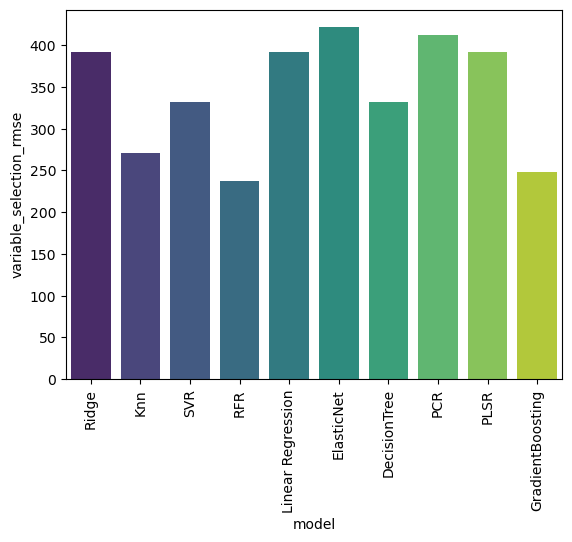

In [440]:
sns.barplot(x="model",y="variable_selection_rmse",data=df_rmse,palette="viridis")
plt.xticks(rotation=90)
plt.show()

After variable selection, from all the above models Random forest and gradient boosting has min rmse so, Random forest and gradient boosting are the best model.

In [441]:
df_rsq=pd.DataFrame(list(variable_selection_rsq.items()),columns=['model','variable_selection_rsq'])
df_rsq

,model,variable_selection_rsq
0,Ridge,0.571949
1,Knn,0.796107
2,SVR,0.692423
3,RFR,0.843662
4,Linear Regression,0.571955
5,ElasticNet,0.505227
6,DecisionTree,0.693093
7,PCR,0.527586
8,PLSR,0.571895
9,GradientBoosting,0.827923


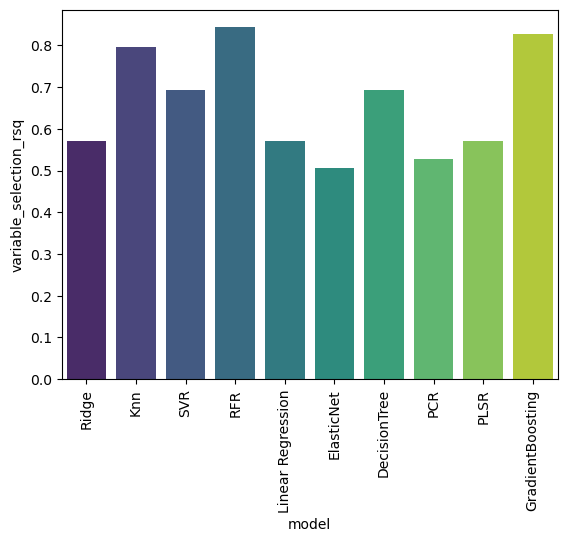

In [442]:
sns.barplot(x="model",y="variable_selection_rsq",data=df_rsq,palette="viridis")
plt.xticks(rotation=90)
plt.show()

After variable selection, from all the above models Random forest and gradient boosting has max rsq so, Random forest and gradient boosting are the best model.

By feature importance the variables hour,Tempreture,Functioning Day,Solar Radiation,humidity and seasons are important.
hence we obtain the models by keeping this variables only . But there is no significant change in rmse and R square values.so, Random forest is best model.